## Observations and Insights 

In [ ]:
# Three Observations
#1. Capomulin and Ramicane had more live mice at the end of the study than other treatments.

#2 Capomulin had the lowest IQR value, so less spread of the final tumor volume, meaning more consistent results

#3 There is a corelation between the mouse weight and the tumor final volume.  The heavier the mouse the larger the final tumor volume.
#  We might need to increase the drug dosage to accomodate the larger weight.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

combined_data_df = combined_data_df.reset_index(drop=True)
combined_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.

mice_count = len(combined_data_df["Mouse ID"].unique())
print(mice_count)


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]

print ((duplicateRowsDF['Mouse ID']).to_string(index=False))

 g989
 g989
 g989
 g989
 g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Drop Duplicates
combined_data_df.drop_duplicates(['Mouse ID', 'Timepoint'], inplace=True)

# Create dataframe
clean_mice_df = pd.DataFrame(combined_data_df, columns = ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']) 

# reset index
clean_mice_df.reset_index(drop=False, inplace=True)
clean_mice_df



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_mice_count = len(clean_mice_df["Mouse ID"].value_counts())
print(clean_mice_count)

249


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

# Converts Dataframe to array
tum_vol = clean_mice_df[['Tumor Volume (mm3)']].values

# Unique list of Drugs
drug_list = clean_mice_df['Drug Regimen'].unique()

#  list of drugs
drug_name = clean_mice_df[['Drug Regimen']].values

# calculate mean
tumor_mean = clean_mice_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

# caluclate median
tumor_median = clean_mice_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

# calculate var
tumor_var = clean_mice_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

# calculate std
tumor_std = clean_mice_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

# caluclate SEM
tumor_sem = clean_mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Create Dataframe
stat_summary_df = pd.DataFrame({"Tumor Mean": tumor_mean, "Tumor Median": tumor_median, "Tumor Variance": tumor_var, "Tumor Std. Dev.": tumor_std, "Tumor SEM": tumor_sem})

stat_summary_df.head(10)
                



,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std. Dev.,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

tumor_table = clean_mice_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

#tumor_table.head
print(tumor_table)




                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar Plots

Text(0, 0.5, 'Number of Live Mice Over Treatment')

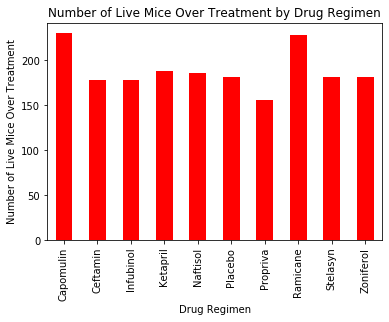

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# get mice count by drug over course of entire time
mice_count = clean_mice_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Create bar graph
mice_count.plot(kind="bar", facecolor="red", y="Mice Count")

# Give the chart a title, x label, and y label
plt.title("Number of Live Mice Over Treatment by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Live Mice Over Treatment")


Text(0, 0.5, 'Number of Live Mice Over Treatment')

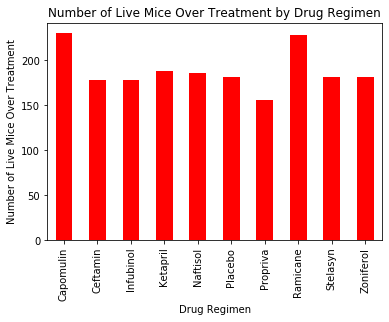

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# get mice count by drug over course of entire time
mice_count = clean_mice_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Create bar graph
mice_count.plot(kind="bar", facecolor="red")

# Give the chart a title, x label, and y label
plt.title("Number of Live Mice Over Treatment by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Live Mice Over Treatment")


## Pie Plots

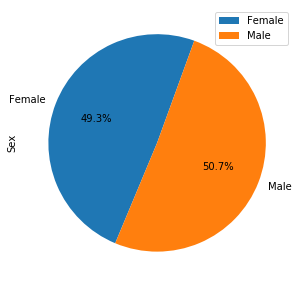

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Groupby Gender
sex_count = clean_mice_df.groupby(["Sex"]).count()["Mouse ID"]

# create dataframe
sex_summary_df = pd.DataFrame({"Sex": sex_count})

# create pie chart
plot = sex_summary_df.plot.pie(y='Sex', autopct='%1.1f%%', startangle=70, figsize=(5, 5))


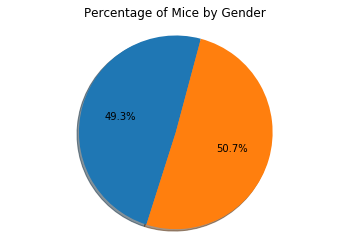

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Groupby Gender
sex_count = clean_mice_df.groupby(["Sex"]).count()["Mouse ID"]

# create dataframe
sex_summary_df = pd.DataFrame({"Sex": sex_count})
#sex_summary_df


#####################################################################  Need Labels from groupby.

plt.title("Percentage of Mice by Gender")

plt.pie(sex_count, autopct="%1.1f%%", shadow=True, startangle=75)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

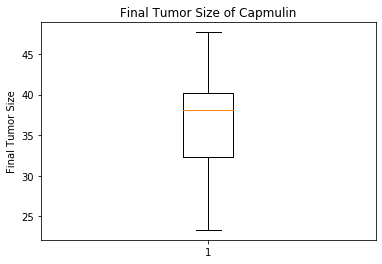

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


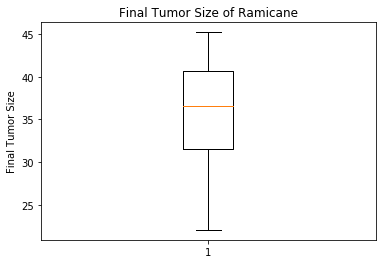

The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


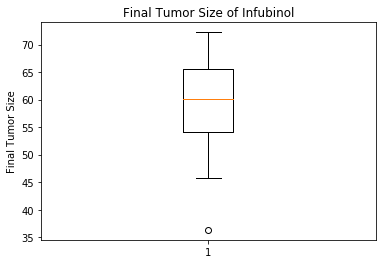

The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


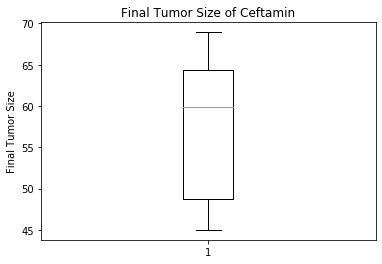

The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter data by top 4 drugs - Capomulin
#cap_data = clean_mice_df.loc[(final4_data['Drug Regimen']=='Capomulin')]
cap_data = clean_mice_df.loc[(clean_mice_df['Drug Regimen']=='Capomulin')]

# Get last volume for each mouse and (before dying)
tum_table = cap_data.groupby(['Drug Regimen','Mouse ID'], as_index=False).last()

# Get series of last volumes
cap_tum = tum_table['Tumor Volume (mm3)']

# Display and label box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size of Capmulin')
ax1.set_ylabel('Final Tumor Size')
ax1.boxplot(cap_tum)
plt.show()

# quartile calculations
quartiles = cap_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
#########################################################

# Filter data by top 4 drugs - Ramicane
ram_data = clean_mice_df.loc[(clean_mice_df['Drug Regimen']=='Ramicane')]

# Get last volume for each mouse and (before dying)
tum_table = ram_data.groupby(['Drug Regimen','Mouse ID'], as_index=False).last()

# Get series of last volumes
ram_tum = tum_table['Tumor Volume (mm3)']

# Display and label box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size of Ramicane')
ax1.set_ylabel('Final Tumor Size')
ax1.boxplot(ram_tum)
plt.show()

# quartile calculations
quartiles = ram_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#########################################################

# Filter data by top 4 drugs - Infubinol
inf_data = clean_mice_df.loc[(clean_mice_df['Drug Regimen']=='Infubinol')]

# Get last volume for each mouse and (before dying)
tum_table = inf_data.groupby(['Drug Regimen','Mouse ID'], as_index=False).last()

# Get series of last volumes
inf_tum = tum_table['Tumor Volume (mm3)']

# Display and label box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size of Infubinol')
ax1.set_ylabel('Final Tumor Size')
ax1.boxplot(inf_tum)
plt.show()

# quartile calculations
quartiles = inf_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#########################################################

# Filter data by top 4 drugs - Ceftamin
cef_data = clean_mice_df.loc[(clean_mice_df['Drug Regimen']=='Ceftamin')]

# Get last volume for each mouse and (before dying)
tum_table = cef_data.groupby(['Drug Regimen','Mouse ID'], as_index=False).last()

# Get series of last volumes
cef_tum = tum_table['Tumor Volume (mm3)']

# Display and label box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size of Ceftamin')
ax1.set_ylabel('Final Tumor Size')
ax1.boxplot(cef_tum)
plt.show()

# quartile calculations
quartiles = inf_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



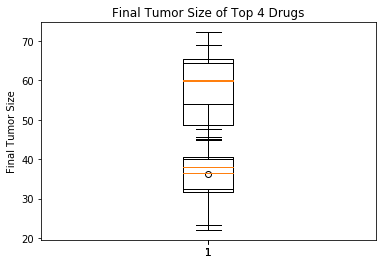

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Display and label box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size of Top 4 Drugs')
ax1.set_ylabel('Final Tumor Size')
ax1.boxplot(cap_tum)
ax1.boxplot(ram_tum)
ax1.boxplot(inf_tum)
ax1.boxplot(cef_tum)

plt.show()

## Line and Scatter Plots

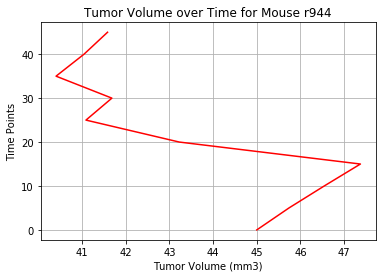

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# r944
# Create series of Timepoint (y axis) and Tumor Volume (x axis)

# Filter by one mouse r944
r944_data = clean_mice_df.loc[(clean_mice_df['Mouse ID']=='r944')]

# Get Timepoint values - y axis
time = r944_data[['Timepoint']].values

# Get Tumor Volume - x axis
vol = r944_data[['Tumor Volume (mm3)']].values

# Plot the line plot
r944_graph, = plt.plot(vol, time, color="red")

# Add labels to X and Y axes :: Add title
plt.title("Tumor Volume over Time for Mouse r944")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time Points")

plt.grid()
plt.show()


Text(0, 0.5, 'Mouse Weight (g)')

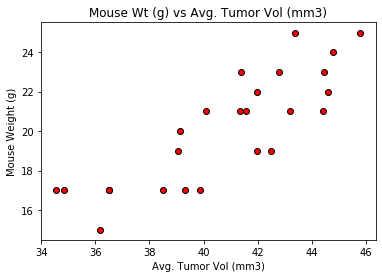

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#  Filter by drug
cap_wt_data = clean_mice_df.loc[(clean_mice_df['Drug Regimen']=='Capomulin')]

# get tumor volume mean by mouse
cap_tum_mean = cap_wt_data.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

# Get Weight per mouse
mouse_wt = cap_wt_data.groupby(["Mouse ID"]).mean()["Weight (g)"]

# draw plot
plt.scatter(cap_tum_mean, mouse_wt, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Mouse Wt (g) vs Avg. Tumor Vol (mm3)")
plt.xlabel("Avg. Tumor Vol (mm3)")
plt.ylabel("Mouse Weight (g)")




## Correlation and Regression

The correlation between both factors is 0.84


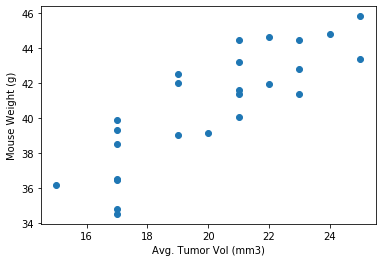

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Get mouse weight, Mouse ID and Final Tumor Volume into a dataframe

# Create Dataframe
wt_avgvol_df = pd.DataFrame({"Weight": mouse_wt, "Tumor Vol": cap_tum_mean})
#wt_avgvol_df

weight = wt_avgvol_df.iloc[:,0]
volume = wt_avgvol_df.iloc[:,1]
correlation = st.pearsonr(weight,volume)
plt.scatter(weight,volume)
plt.xlabel('Avg. Tumor Vol (mm3)')
plt.ylabel('Mouse Weight (g)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()
